# INTELIGENCIA ARTIFICIAL
## GRUPO 5
### Predecir el desempeño financiero en las Compañias en el Ecuador
- El objetivo principal de este documento es analizar el desempeño financiero de las compañias nacionales registrador por la supercias.
- Determinar si la eficiencia operativa, la gestión de activos, el tamaño de la compañia si existe un impacto estadísticamente significativo en el rendimiento interno (ROA) Y (ROE).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torch

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset/indicadores2019_cia.csv')
len(df)

11757

In [4]:
# Simplemente puede usar DataFrame.fillna para rellenar los nan's directamente
df = df.dropna()

In [5]:
df.columns = ['año',
              'expediente',
              'nombre',
              'rama',
              'des_rama',
              'rama_6_dig',
              'sub_ra',
              'liquidez_corriente',
              'prueba_acida',
              'en_activo',
              'en_patrimonial',
              'en_corto_plazo',
              'en_largo_plazo',
              'cobertura_intereses',
              'en_activo_fijo',
              'apalancamiento', 
              'apalancamiento_fin',
              'fortaleza_patrimonial',
              'en_patrimonial_corriente',
              'en_patrimonial_no_corriente', 
              'apa_corto_largo_plazo', 
              'rot_cartera', 
              'rot_activo_fijo',
              'rot_ventas',
              'per_cobranza_CP',
              'per_pago_CP',
              'impacto_gastos_adm_ven',
              'impacto_carga_financiera',
              'rentabilidad_neta_activo',
              'margen_bruto',
              'margen_operacional',
              'rent_neta_ventas', 
              'rent_operacional_patri',
              'rentabilidad_fin', 
              'Utilidad_total_activos', 
              'ROE',
              'ROA']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3250 entries, 1 to 11754
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   año                          3250 non-null   int64  
 1   expediente                   3250 non-null   int64  
 2   nombre                       3250 non-null   object 
 3   rama                         3250 non-null   object 
 4   des_rama                     3250 non-null   object 
 5   rama_6_dig                   3250 non-null   object 
 6   sub_ra                       3250 non-null   object 
 7   liquidez_corriente           3250 non-null   float64
 8   prueba_acida                 3250 non-null   float64
 9   en_activo                    3250 non-null   float64
 10  en_patrimonial               3250 non-null   float64
 11  en_corto_plazo               3250 non-null   float64
 12  en_largo_plazo               3250 non-null   float64
 13  cobertura_interes

In [6]:
df['ROA_DIS'] = pd.qcut(df['ROA'], 5, labels=['muy malo','malo','medio','bueno','muy bueno'])

## TIPO DE DATO


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3250 entries, 1 to 11754
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   año                          3250 non-null   int64   
 1   expediente                   3250 non-null   int64   
 2   nombre                       3250 non-null   object  
 3   rama                         3250 non-null   object  
 4   des_rama                     3250 non-null   object  
 5   rama_6_dig                   3250 non-null   object  
 6   sub_ra                       3250 non-null   object  
 7   liquidez_corriente           3250 non-null   float64 
 8   prueba_acida                 3250 non-null   float64 
 9   en_activo                    3250 non-null   float64 
 10  en_patrimonial               3250 non-null   float64 
 11  en_corto_plazo               3250 non-null   float64 
 12  en_largo_plazo               3250 non-null   float64 
 13  co

# Verificar si existen resultados con alguna anomalía

In [8]:
print(df.describe)

<bound method NDFrame.describe of         año  expediente                                   nombre rama  \
1      2019           2            ACERIA DEL ECUADOR CA ADELCA.    C   
2      2019           3         ACERO COMERCIAL ECUATORIANO S.A.    G   
4      2019          22  AGENCIAS Y REPRESENTACIONES CORDOVEZ SA    G   
7      2019          49           ALMACENES EL GLOBO DE QUITO SA    G   
8      2019          63                           CONFITECA C.A.    C   
...     ...         ...                                      ...  ...   
11733  2019       62595                            DOMINTEK S.A.    G   
11735  2019       62598                           ARKEASLAB S.A.    M   
11737  2019       62603                    BMV INMOBILIARIA S.A.    L   
11751  2019       62633                          IMPORTLENS S.A.    G   
11754  2019       62637                           WORKCOSTA S.A.    C   

                                                des_rama rama_6_dig sub_ra  \
1          

# Visual de valores atípicos existentes

array([[<AxesSubplot:title={'center':'año'}>,
        <AxesSubplot:title={'center':'expediente'}>,
        <AxesSubplot:title={'center':'liquidez_corriente'}>,
        <AxesSubplot:title={'center':'prueba_acida'}>,
        <AxesSubplot:title={'center':'en_activo'}>,
        <AxesSubplot:title={'center':'en_patrimonial'}>],
       [<AxesSubplot:title={'center':'en_corto_plazo'}>,
        <AxesSubplot:title={'center':'en_largo_plazo'}>,
        <AxesSubplot:title={'center':'cobertura_intereses'}>,
        <AxesSubplot:title={'center':'en_activo_fijo'}>,
        <AxesSubplot:title={'center':'apalancamiento'}>,
        <AxesSubplot:title={'center':'apalancamiento_fin'}>],
       [<AxesSubplot:title={'center':'fortaleza_patrimonial'}>,
        <AxesSubplot:title={'center':'en_patrimonial_corriente'}>,
        <AxesSubplot:title={'center':'en_patrimonial_no_corriente'}>,
        <AxesSubplot:title={'center':'apa_corto_largo_plazo'}>,
        <AxesSubplot:title={'center':'rot_cartera'}>,
    

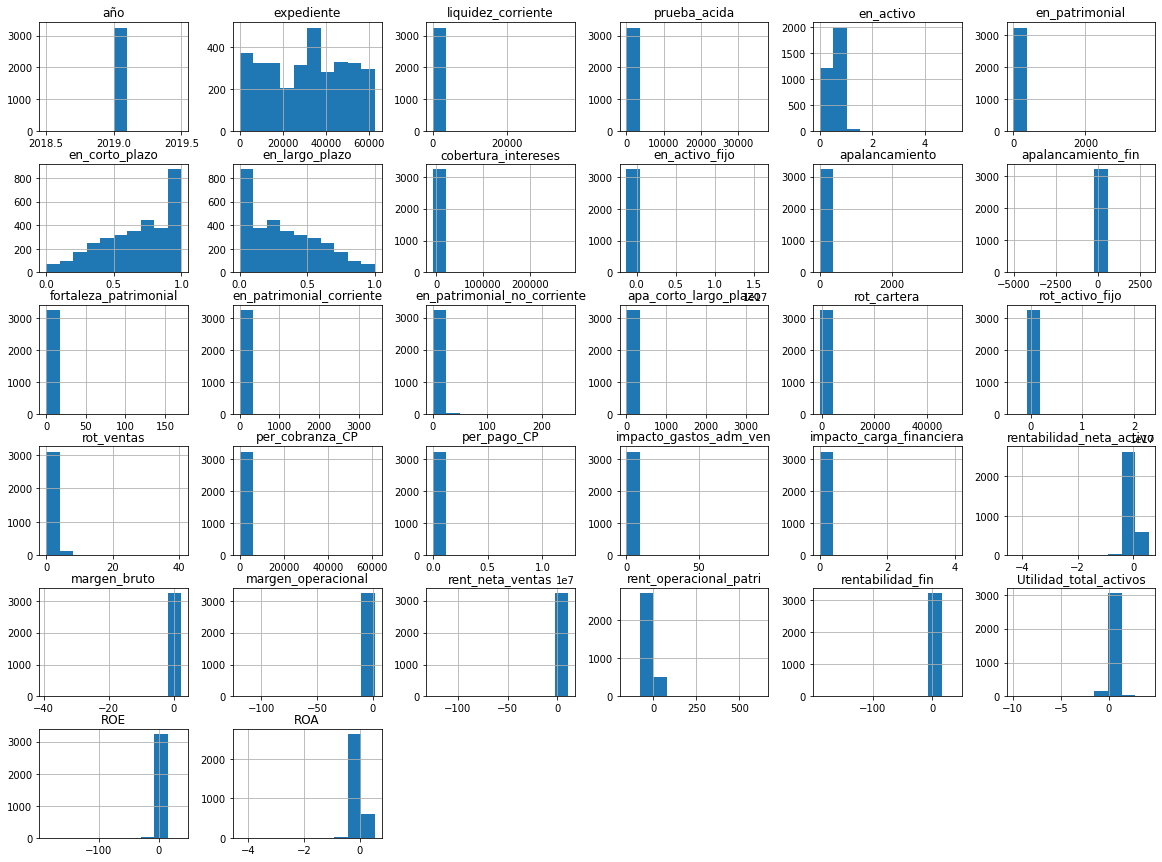

In [9]:
df.hist(figsize=(20, 15))

# Limpieza de datos 
- Eliminación de valores atípicos

In [10]:
def outlier(df):
    data=np.sort(df)
    Q1,Q3=np.percentile(df,[25,75])
    IQR=Q3-Q1
    lower=Q1-(1.5*IQR)
    upper=Q3+(1.5*IQR)
    return lower,upper

# Datos que solo se consideran en la limpieza de datos
- La explicación es que en la primera versión del proyecto, se realizó la limpieza del todos los datos numéricos, pero la novedad es que, dejaron como resultado 21 datos, en la cual llevo a replantear la limpieza para ver si, en ciertos datos se realizaba la eliminación de los datos atípicos,
como resultado las variables seleccionadas son:
- ROE
- ROA
- RENTABILIDAD OPERACIONAL PATRIMONIAL
- UTILIDAD TOTAL DE ACTIVOS

<AxesSubplot:xlabel='rent_operacional_patri'>

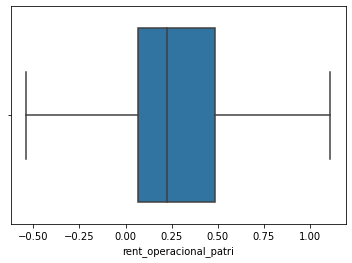

In [17]:
lr,ur=outlier(df['rent_operacional_patri'])
df.drop(df.index[(df.rent_operacional_patri > ur)],inplace=True)
df.drop(df.index[(df.rent_operacional_patri < lr)],inplace=True)
sns.boxplot(x=df["rent_operacional_patri"], orient="h")

<AxesSubplot:xlabel='Utilidad_total_activos'>

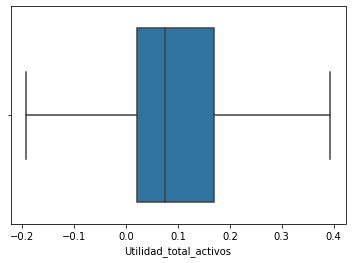

In [23]:
lr,ur=outlier(df['Utilidad_total_activos'])
df.drop(df.index[(df.Utilidad_total_activos > ur)],inplace=True)
df.drop(df.index[(df.Utilidad_total_activos < lr)],inplace=True)
sns.boxplot(x=df["Utilidad_total_activos"], orient="h")

<AxesSubplot:xlabel='ROE'>

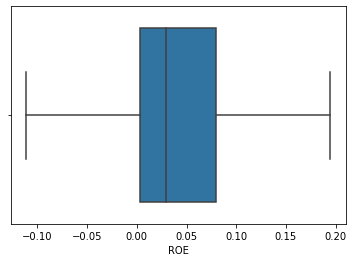

In [29]:
lr,ur=outlier(df['ROE'])
df.drop(df.index[(df.ROE > ur)],inplace=True)
df.drop(df.index[(df.ROE < lr)],inplace=True)
sns.boxplot(x=df["ROE"], orient="h")

<AxesSubplot:xlabel='ROA'>

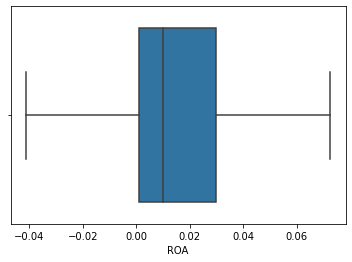

In [34]:
lr,ur=outlier(df['ROA'])
df.drop(df.index[(df.ROA > ur)],inplace=True)
df.drop(df.index[(df.ROA < lr)],inplace=True)
sns.boxplot(x=df["ROA"], orient="h")

In [35]:
len(df)

1760

In [36]:
data = df[['rent_operacional_patri',
           'Utilidad_total_activos',
           'ROE',
           'ROA']]
data = pd.DataFrame(data)

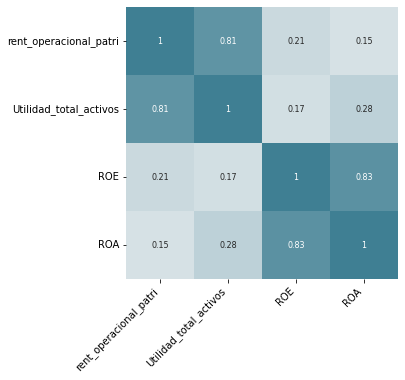

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
sns.heatmap(data.corr(), 
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

# Tipo de dato Categoria
- Cantidad de datos evaluado.

In [38]:
df['ROA_DIS'].value_counts()

medio        491
malo         489
bueno        447
muy malo     208
muy bueno    125
Name: ROA_DIS, dtype: int64

# Predecir ROE aplicando un modelo lineal

In [39]:
x = data[['rent_operacional_patri',
          'Utilidad_total_activos',
          'ROA']]
y = data[['ROE']]

In [40]:
dataX = pd.DataFrame(x)
dataY = pd.DataFrame(y)

In [41]:
X = dataX.to_numpy()
X

array([[ 0.11289293,  0.05181951,  0.01361235],
       [-0.09170358, -0.03290078, -0.01656493],
       [ 0.12907682,  0.03605707,  0.01638314],
       ...,
       [ 0.01460389,  0.00154365,  0.01252904],
       [ 0.3594124 ,  0.12450783,  0.00336673],
       [ 0.48613971,  0.13928075,  0.01713455]])

In [42]:
Y = dataY.to_numpy() #ROE
Y

array([[ 0.02965559],
       [-0.04617106],
       [ 0.05864824],
       ...,
       [ 0.11853252],
       [ 0.00971861],
       [ 0.05980571]])

In [43]:
x.shape

(1760, 3)

In [44]:
y.shape

(1760, 1)

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)
# Los datos se entrenaron y se realizo el testeo, con una precision 0,20 o 20%

In [46]:
import sklearn
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [47]:
import numpy as np
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
Y_train = torch.from_numpy(Y_train.astype(np.float32))
Y_test = torch.from_numpy(Y_test.astype(np.float32))

In [48]:
Y_train = Y_train.view(Y_train.shape[0],1) #redimension a matriz
Y_test = Y_test.view(Y_test.shape[0],1)

# Regresion Lineal

In [49]:
class ModeloRegresionLineal(torch.nn.Module):
  def __init__(self):
    super(ModeloRegresionLineal, self).__init__()
    self.linear = torch.nn.Linear(3,1)
  
  def forward(self, x):
    y_pred = self.linear(x)
    return y_pred


#función que visualiza la evolución de la perdida y la precisión en cada epoch

In [54]:
#función que visualiza la evolución de la perdida y la precisión en cada epoch
def plot_loss(epochs, loss, loss_test):
  xlim = len(loss)
  plt.plot(epochs,loss)
  plt.plot(epochs,loss_test)
  plt.xlabel('Epochs')
  plt.ylabel('Value')
  plt.legend(('Train loss','Test loss'),loc='center right',shadow=True)
  plt.title('Train and Test Loss')

#función que realiza el entrenamiento

In [55]:
#función que realiza el entrenamiento
def train(num_epochs, optimizer, cost, model):
  #listas usadas para guardar los valores de pérdida, precisión, para cada epoch
  #esta información sirve para graficar el proceso de entrenamiento
  loss_vals = []
  loss_test_vals = []
  acc_vals = []
  epoch_vals = []

  #entrenamiento
  for epoch in range(num_epochs):
    y_pred = model(X_train)
    loss = cost(y_pred,Y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    #se evalua cada 5 epochs
    if (epoch+1)%5 == 0:
      with torch.no_grad():
        loss_vals.append(loss.item())
        y_pred_test = model(X_test)  #se usan los datos de prueba para evaluar el modelo
        loss_test = cost(y_pred_test, Y_test)
        loss_test_vals.append(loss_test.item())
        y_pred_class = y_pred_test
        epoch_vals.append(epoch)
      print(f'epoch:{epoch+1} loss={loss.item()} loss_test={loss_test.item()}')
  plot_loss(epoch_vals,loss_vals,loss_test_vals)    

epoch:5 loss=0.4715762436389923 loss_test=0.4414092004299164
epoch:10 loss=0.33458197116851807 loss_test=0.3136022090911865
epoch:15 loss=0.24021023511886597 loss_test=0.22551365196704865
epoch:20 loss=0.1749529242515564 loss_test=0.16456088423728943
epoch:25 loss=0.12961643934249878 loss_test=0.12217977643013
epoch:30 loss=0.09793800860643387 loss_test=0.09253618866205215
epoch:35 loss=0.07564695179462433 loss_test=0.0716514065861702
epoch:40 loss=0.05982736498117447 loss_test=0.056808385998010635
epoch:45 loss=0.04848527908325195 loss_test=0.04614882543683052
epoch:50 loss=0.04025459662079811 loss_test=0.03839917108416557
epoch:55 loss=0.03419734537601471 loss_test=0.03268460929393768
epoch:60 loss=0.02966773509979248 loss_test=0.028402535244822502
epoch:65 loss=0.026219725608825684 loss_test=0.025136418640613556
epoch:70 loss=0.02354404889047146 loss_test=0.022597214207053185
epoch:75 loss=0.021425312384963036 loss_test=0.020583361387252808
epoch:80 loss=0.019712699577212334 loss_te

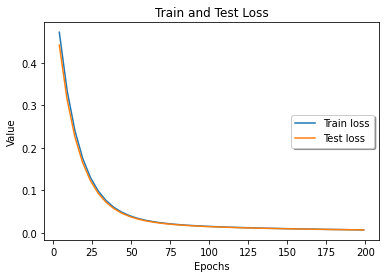

In [56]:
n_features = x.shape[1] #en este caso 30 features
lr_model = ModeloRegresionLineal()
costo =  torch.nn.MSELoss()  #MSE 
optim = torch.optim.SGD(lr_model.parameters(),lr=0.01) #gradiente descendente
train(num_epochs=200, optimizer=optim, cost=costo, model=lr_model)

In [57]:
lr_model

ModeloRegresionLineal(
  (linear): Linear(in_features=3, out_features=1, bias=True)
)

In [58]:
lr_model.linear.weight#w

Parameter containing:
tensor([[ 0.1475, -0.1561,  0.0771]], requires_grad=True)

In [59]:
lr_model.linear.bias#b

Parameter containing:
tensor([0.0392], requires_grad=True)

#Predicción año 2019


In [60]:
x_2019 = torch.from_numpy(np.array([[X]], 
  dtype='float32'))
y_2019 = lr_model(x_2019) #predicción
print(y_2019.mean())
print('prediccion media : ',y_2019.mean())
print('prediccion maxima : ',y_2019.max())
print('prediccion minima : ',y_2019.min())

tensor(0.0608, grad_fn=<MeanBackward0>)
prediccion media :  tensor(0.0608, grad_fn=<MeanBackward0>)
prediccion maxima :  tensor(0.1903, grad_fn=<MaxBackward1>)
prediccion minima :  tensor(-0.0334, grad_fn=<MinBackward1>)


In [61]:
df_2018 = pd.read_csv('/content/drive/MyDrive/dataset/indicadores2018_cia.csv')
df_2020 = pd.read_csv('/content/drive/MyDrive/dataset/indicadores2020_cia.csv')
df_2017 = pd.read_csv('/content/drive/MyDrive/dataset/indicadores2017_cia_.csv')

# Predecir 2017

In [62]:
len(df_2017)

13079

In [63]:
df_2017.columns = ['año',
              'expediente',
              'nombre',
              'rama',
              'des_rama',
              'rama_6_dig',
              'sub_ra',
              'liquidez_corriente',
              'prueba_acida',
              'en_activo',
              'en_patrimonial',
              'en_corto_plazo',
              'en_largo_plazo',
              'cobertura_intereses',
              'en_activo_fijo',
              'apalancamiento', 
              'apalancamiento_fin',
              'fortaleza_patrimonial',
              'en_patrimonial_corriente',
              'en_patrimonial_no_corriente', 
              'apa_corto_largo_plazo', 
              'rot_cartera', 
              'rot_activo_fijo',
              'rot_ventas',
              'per_cobranza_CP',
              'per_pago_CP',
              'impacto_gastos_adm_ven',
              'impacto_carga_financiera',
              'rentabilidad_neta_activo',
              'margen_bruto',
              'margen_operacional',
              'rent_neta_ventas', 
              'rent_operacional_patri',
              'rentabilidad_fin', 
              'Utilidad_total_activos', 
              'ROE',
              'ROA']
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13079 entries, 0 to 13078
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   año                          13079 non-null  int64  
 1   expediente                   13079 non-null  int64  
 2   nombre                       13079 non-null  object 
 3   rama                         13079 non-null  object 
 4   des_rama                     13079 non-null  object 
 5   rama_6_dig                   13077 non-null  object 
 6   sub_ra                       13077 non-null  object 
 7   liquidez_corriente           10815 non-null  float64
 8   prueba_acida                 10815 non-null  float64
 9   en_activo                    12768 non-null  float64
 10  en_patrimonial               12770 non-null  float64
 11  en_corto_plazo               11134 non-null  float64
 12  en_largo_plazo               11134 non-null  float64
 13  cobertura_intere

In [64]:
x = df_2017[['rent_operacional_patri',
          'Utilidad_total_activos',
          'ROA']]
y = df_2017[['ROE']]

In [65]:
dataX2017 = pd.DataFrame(x)
dataY2017 = pd.DataFrame(y)

In [66]:
X = dataX2017.to_numpy()
X

Y = dataY2017.to_numpy() #ROE
Y

array([[ 0.01785733],
       [ 0.05166009],
       [-0.13251808],
       ...,
       [ 0.12589872],
       [ 0.07743767],
       [ 0.99885482]])

In [67]:
x_2017 = torch.from_numpy(np.array([[X]], 
  dtype='float32'))
y_2017 = lr_model(x_2019) #predicción
print(y_2017.mean())
print('prediccion media : ',y_2017.mean())
print('prediccion maxima : ',y_2017.max())
print('prediccion minima : ',y_2017.min())

tensor(0.0608, grad_fn=<MeanBackward0>)
prediccion media :  tensor(0.0608, grad_fn=<MeanBackward0>)
prediccion maxima :  tensor(0.1903, grad_fn=<MaxBackward1>)
prediccion minima :  tensor(-0.0334, grad_fn=<MinBackward1>)


In [70]:
x_2017 = df_2017[['rent_operacional_patri',
          'Utilidad_total_activos',
          'ROA']]
y_2017 = df_2017[['ROE']]

In [71]:
data['Prediccion_ROE_2017'] = 0.0
y_2017['Prediccion_ROE_2017'] = 0.0

for i in range(x_2017.shape[0]):
    x_pre_2017 = torch.from_numpy(np.array([ x_2017.iloc[i, 0],
                                        x_2017.iloc[i, 1],
                                        x_2017.iloc[i, -1]],dtype='float32'))
    y_pre_2017 = lr_model(x_pre_2017) #predicción
    j = y_pre_2017.detach().numpy() #convertido en numpy
    print(f'predicción: {y_pre_2017} , {j}')
    data.Prediccion_ROE_2017[i] = j
    y_2017.Prediccion_ROE_2017[i] = j

<ipython-input-71-add9652ac28e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_2017['Prediccion_ROE_2017'] = 0.0
<ipython-input-71-add9652ac28e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_2017.Prediccion_ROE_2017[i] = j


Se truncaron las últimas líneas 5000 del resultado de transmisión.
predicción: tensor([0.3470], grad_fn=<AddBackward0>) , [0.34703878]
predicción: tensor([0.0329], grad_fn=<AddBackward0>) , [0.03292491]
predicción: tensor([0.0622], grad_fn=<AddBackward0>) , [0.0621729]
predicción: tensor([0.0413], grad_fn=<AddBackward0>) , [0.04125483]
predicción: tensor([0.0728], grad_fn=<AddBackward0>) , [0.07277584]
predicción: tensor([nan], grad_fn=<AddBackward0>) , [nan]
predicción: tensor([0.1945], grad_fn=<AddBackward0>) , [0.1945101]
predicción: tensor([0.0286], grad_fn=<AddBackward0>) , [0.02864104]
predicción: tensor([0.1032], grad_fn=<AddBackward0>) , [0.10322484]
predicción: tensor([0.0413], grad_fn=<AddBackward0>) , [0.04132839]
predicción: tensor([-3.9960], grad_fn=<AddBackward0>) , [-3.9959977]
predicción: tensor([0.0400], grad_fn=<AddBackward0>) , [0.0400419]
predicción: tensor([0.0946], grad_fn=<AddBackward0>) , [0.09459595]
predicción: tensor([0.0423], grad_fn=<AddBackward0>) , [0.042

#Resultados 2017

In [72]:
y_2017

,ROE,Prediccion_ROE_2017
0,0.017857,0.040201
1,0.051660,0.080915
2,-0.132518,0.015408
3,0.500468,0.323252
4,0.051951,0.047239
...,...,...
13074,-0.044650,0.036152
13075,-0.528404,-0.031532
13076,0.125899,0.126951
13077,0.077438,0.052756


# Predecir 2018

In [83]:
len(df_2018)

12469

In [84]:
df_2018.columns = ['año',
              'expediente',
              'nombre',
              'rama',
              'des_rama',
              'rama_6_dig',
              'sub_ra',
              'liquidez_corriente',
              'prueba_acida',
              'en_activo',
              'en_patrimonial',
              'en_corto_plazo',
              'en_largo_plazo',
              'cobertura_intereses',
              'en_activo_fijo',
              'apalancamiento', 
              'apalancamiento_fin',
              'fortaleza_patrimonial',
              'en_patrimonial_corriente',
              'en_patrimonial_no_corriente', 
              'apa_corto_largo_plazo', 
              'rot_cartera', 
              'rot_activo_fijo',
              'rot_ventas',
              'per_cobranza_CP',
              'per_pago_CP',
              'impacto_gastos_adm_ven',
              'impacto_carga_financiera',
              'rentabilidad_neta_activo',
              'margen_bruto',
              'margen_operacional',
              'rent_neta_ventas', 
              'rent_operacional_patri',
              'rentabilidad_fin', 
              'Utilidad_total_activos', 
              'ROE',
              'ROA']
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12469 entries, 0 to 12468
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   año                          12469 non-null  int64  
 1   expediente                   12469 non-null  int64  
 2   nombre                       12469 non-null  object 
 3   rama                         12469 non-null  object 
 4   des_rama                     12469 non-null  object 
 5   rama_6_dig                   12467 non-null  object 
 6   sub_ra                       12467 non-null  object 
 7   liquidez_corriente           10273 non-null  float64
 8   prueba_acida                 10273 non-null  float64
 9   en_activo                    12045 non-null  float64
 10  en_patrimonial               12054 non-null  float64
 11  en_corto_plazo               10585 non-null  float64
 12  en_largo_plazo               10585 non-null  float64
 13  cobertura_intere

In [90]:
x_2018 = df_2018[['rent_operacional_patri',
          'Utilidad_total_activos',
          'ROA']]
y_2018 = df_2018[['ROE']]

In [91]:
dataX2018 = pd.DataFrame(x_2018)
dataY2018 = pd.DataFrame(y_2018)

In [92]:
X2018 = dataX2018.to_numpy()
X2018

Y2018 = dataY2018.to_numpy() #ROE
Y2018

array([[0.0098871 ],
       [0.02539682],
       [0.05363422],
       ...,
       [0.17418453],
       [0.08497189],
       [0.99843407]])

In [93]:
x2018 = torch.from_numpy(np.array([[X2018]], 
  dtype='float32'))
y2018 = lr_model(x2018) #predicción
print(y2018.mean())
print('prediccion media : ',y2018.mean())
print('prediccion maxima : ',y2018.max())
print('prediccion minima : ',y2018.min())

tensor(nan, grad_fn=<MeanBackward0>)
prediccion media :  tensor(nan, grad_fn=<MeanBackward0>)
prediccion maxima :  tensor(nan, grad_fn=<MaxBackward1>)
prediccion minima :  tensor(nan, grad_fn=<MinBackward1>)


In [94]:
# primera fila , primera columna
x_2018.iloc[ 0 , 0] # Primera columna


0.079795174

In [ ]:
x_2018.iloc[ 0, 1 ] # Segunda columna

0.077261463

In [95]:
x_2018.iloc[0 , -1] # Última columna

0.0095731569

In [96]:
data['Prediccion_ROE_2018'] = 0.0
y_2018['Prediccion_ROE_2018'] = 0.0

for i in range(x_2018.shape[0]):
    x_pre_2018 = torch.from_numpy(np.array([ x_2018.iloc[i, 0],
                                        x_2018.iloc[i, 1],
                                        x_2018.iloc[i, -1]],dtype='float32'))
    y_pre_2018 = lr_model(x_pre_2018) #predicción
    j = y_pre_2018.detach().numpy() #convertido en numpy
    #print(f'predicción: {y_pre_2018} , {j}')
    data.Prediccion_ROE_2018[i] = j
    y_2018.Prediccion_ROE_2018[i] = j

<ipython-input-96-88cedcd03ab5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_2018['Prediccion_ROE_2018'] = 0.0
<ipython-input-96-88cedcd03ab5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_2018.Prediccion_ROE_2018[i] = j


In [97]:
y_2018

,ROE,Prediccion_ROE_2018
0,0.009887,0.039655
1,0.025397,0.079003
2,0.053634,0.041682
3,0.567687,0.233798
4,0.117653,0.063444
...,...,...
12464,0.000000,0.039209
12465,-0.084414,0.027854
12466,0.174185,0.120709
12467,0.084972,0.049217


# Predecir 2020

In [98]:
df_2020.columns = ['año',
              'expediente',
              'nombre',
              'rama',
              'des_rama',
              'rama_6_dig',
              'sub_ra',
              'liquidez_corriente',
              'prueba_acida',
              'en_activo',
              'en_patrimonial',
              'en_corto_plazo',
              'en_largo_plazo',
              'cobertura_intereses',
              'en_activo_fijo',
              'apalancamiento', 
              'apalancamiento_fin',
              'fortaleza_patrimonial',
              'en_patrimonial_corriente',
              'en_patrimonial_no_corriente', 
              'apa_corto_largo_plazo', 
              'rot_cartera', 
              'rot_activo_fijo',
              'rot_ventas',
              'per_cobranza_CP',
              'per_pago_CP',
              'impacto_gastos_adm_ven',
              'impacto_carga_financiera',
              'rentabilidad_neta_activo',
              'margen_bruto',
              'margen_operacional',
              'rent_neta_ventas', 
              'rent_operacional_patri',
              'rentabilidad_fin', 
              'Utilidad_total_activos', 
              'ROE',
              'ROA']
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10844 entries, 0 to 10843
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   año                          10844 non-null  int64  
 1   expediente                   10844 non-null  int64  
 2   nombre                       10844 non-null  object 
 3   rama                         10844 non-null  object 
 4   des_rama                     10844 non-null  object 
 5   rama_6_dig                   10842 non-null  object 
 6   sub_ra                       10842 non-null  object 
 7   liquidez_corriente           8847 non-null   float64
 8   prueba_acida                 8847 non-null   float64
 9   en_activo                    10497 non-null  float64
 10  en_patrimonial               10510 non-null  float64
 11  en_corto_plazo               9141 non-null   float64
 12  en_largo_plazo               9141 non-null   float64
 13  cobertura_intere

In [99]:
x_2020 = df_2020[['rent_operacional_patri',
          'Utilidad_total_activos',
          'ROA']]
y_2020 = df_2020[['ROE']]

In [100]:
dataX2020 = pd.DataFrame(x_2020)
dataY2020 = pd.DataFrame(y_2020)

In [101]:
X2020 = dataX2020.to_numpy()
X2020

Y2020 = dataY2020.to_numpy() #ROE
Y2020

array([[ 0.01782197],
       [ 0.0339948 ],
       [-0.08051773],
       ...,
       [-0.0913743 ],
       [-0.67555308],
       [ 0.99858677]])

In [102]:
Tx_2020 = torch.from_numpy(np.array([[X2020]], 
  dtype='float32'))
Ty_2020 = lr_model(Tx_2020) #predicción
print(Ty_2020.mean())
print('prediccion media : ',Ty_2020.mean())
print('prediccion maxima : ',Ty_2020.max())
print('prediccion minima : ',Ty_2020.min())

tensor(nan, grad_fn=<MeanBackward0>)
prediccion media :  tensor(nan, grad_fn=<MeanBackward0>)
prediccion maxima :  tensor(nan, grad_fn=<MaxBackward1>)
prediccion minima :  tensor(nan, grad_fn=<MinBackward1>)


In [103]:
data['Prediccion_ROE_2020'] = 0.0
y_2020['Prediccion_ROE_2020'] = 0.0

for i in range(x_2020.shape[0]):
    x_pre_2020 = torch.from_numpy(np.array([ x_2020.iloc[i, 0],
                                        x_2020.iloc[i, 1],
                                        x_2020.iloc[i, -1]],dtype='float32'))
    y_pre_2020 = lr_model(x_pre_2020) #predicción
    j = y_pre_2020.detach().numpy() #convertido en numpy
    print(f'predicción: {y_pre_2020} , {j}')
    data.Prediccion_ROE_2020[i] = j
    y_2020.Prediccion_ROE_2020[i] = j

<ipython-input-103-9c6ed08ad7a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_2020['Prediccion_ROE_2020'] = 0.0
<ipython-input-103-9c6ed08ad7a6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_2020.Prediccion_ROE_2020[i] = j


Se truncaron las últimas líneas 5000 del resultado de transmisión.
predicción: tensor([0.0392], grad_fn=<AddBackward0>) , [0.03920864]
predicción: tensor([0.1122], grad_fn=<AddBackward0>) , [0.11219025]
predicción: tensor([0.0396], grad_fn=<AddBackward0>) , [0.03959284]
predicción: tensor([0.0391], grad_fn=<AddBackward0>) , [0.03911061]
predicción: tensor([0.0397], grad_fn=<AddBackward0>) , [0.03974216]
predicción: tensor([0.0296], grad_fn=<AddBackward0>) , [0.02963554]
predicción: tensor([nan], grad_fn=<AddBackward0>) , [nan]
predicción: tensor([0.0392], grad_fn=<AddBackward0>) , [0.03920864]
predicción: tensor([-0.0685], grad_fn=<AddBackward0>) , [-0.06848384]
predicción: tensor([0.0673], grad_fn=<AddBackward0>) , [0.06726939]
predicción: tensor([0.0433], grad_fn=<AddBackward0>) , [0.04330825]
predicción: tensor([0.0387], grad_fn=<AddBackward0>) , [0.03871342]
predicción: tensor([0.0382], grad_fn=<AddBackward0>) , [0.03817026]
predicción: tensor([0.0341], grad_fn=<AddBackward0>) , [0

In [104]:
y_2020

,ROE,Prediccion_ROE_2020
0,0.017822,0.040295
1,0.033995,0.043133
2,-0.080518,0.025960
3,0.054173,0.058614
4,0.093772,0.057380
...,...,...
10839,0.774025,1.092019
10840,0.000000,0.039209
10841,-0.091374,0.026774
10842,-0.675553,0.093558


#Predicción del año 2017, 2018 y 2020 


In [105]:
data

,rent_operacional_patri,Utilidad_total_activos,ROE,ROA,Prediccion_ROE_2017,Prediccion_ROE_2018,Prediccion_ROE_2020
1,0.112893,0.051820,0.029656,0.013612,0.080915,0.079003,0.043133
2,-0.091704,-0.032901,-0.046171,-0.016565,0.015408,0.041682,0.025960
4,0.129077,0.036057,0.058648,0.016383,0.047239,0.063444,0.057380
8,0.705121,0.359713,0.055154,0.028136,0.103399,0.104517,0.058015
11,0.142573,0.067217,0.055185,0.026017,0.041440,0.056657,0.040916
...,...,...,...,...,...,...,...
11699,0.345374,0.084077,0.095347,0.023211,-1.674999,0.083183,0.000000
11706,0.117946,0.057972,0.042302,0.020792,0.039209,0.209903,0.000000
11718,0.014604,0.001544,0.118533,0.012529,0.071545,0.071465,0.000000
11733,0.359412,0.124508,0.009719,0.003367,0.039829,NaN,0.000000


#Matriz de correlación

In [106]:
corr_matrix = data[["Prediccion_ROE_2017", "Prediccion_ROE_2018", "Prediccion_ROE_2020", "ROE"]].corr()

print(corr_matrix)

                     Prediccion_ROE_2017  Prediccion_ROE_2018  \
Prediccion_ROE_2017             1.000000            -0.004955   
Prediccion_ROE_2018            -0.004955             1.000000   
Prediccion_ROE_2020            -0.002190             0.000769   
ROE                             0.006246             0.018454   

                     Prediccion_ROE_2020       ROE  
Prediccion_ROE_2017            -0.002190  0.006246  
Prediccion_ROE_2018             0.000769  0.018454  
Prediccion_ROE_2020             1.000000 -0.020834  
ROE                            -0.020834  1.000000  


# Predecir ROA regresión logística

In [108]:
df['Roa_dis_num'] = pd.qcut(df['ROA'], 5 ).cat.codes

In [109]:
data_roa = df[['rent_operacional_patri',
           'Utilidad_total_activos',
           'ROE',
           'Roa_dis_num']]
data_roa = pd.DataFrame(data_roa)

In [110]:
data_roa

,rent_operacional_patri,Utilidad_total_activos,ROE,Roa_dis_num
1,0.112893,0.051820,0.029656,2
2,-0.091704,-0.032901,-0.046171,0
4,0.129077,0.036057,0.058648,3
8,0.705121,0.359713,0.055154,3
11,0.142573,0.067217,0.055185,3
...,...,...,...,...
11699,0.345374,0.084077,0.095347,3
11706,0.117946,0.057972,0.042302,3
11718,0.014604,0.001544,0.118533,2
11733,0.359412,0.124508,0.009719,1


array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

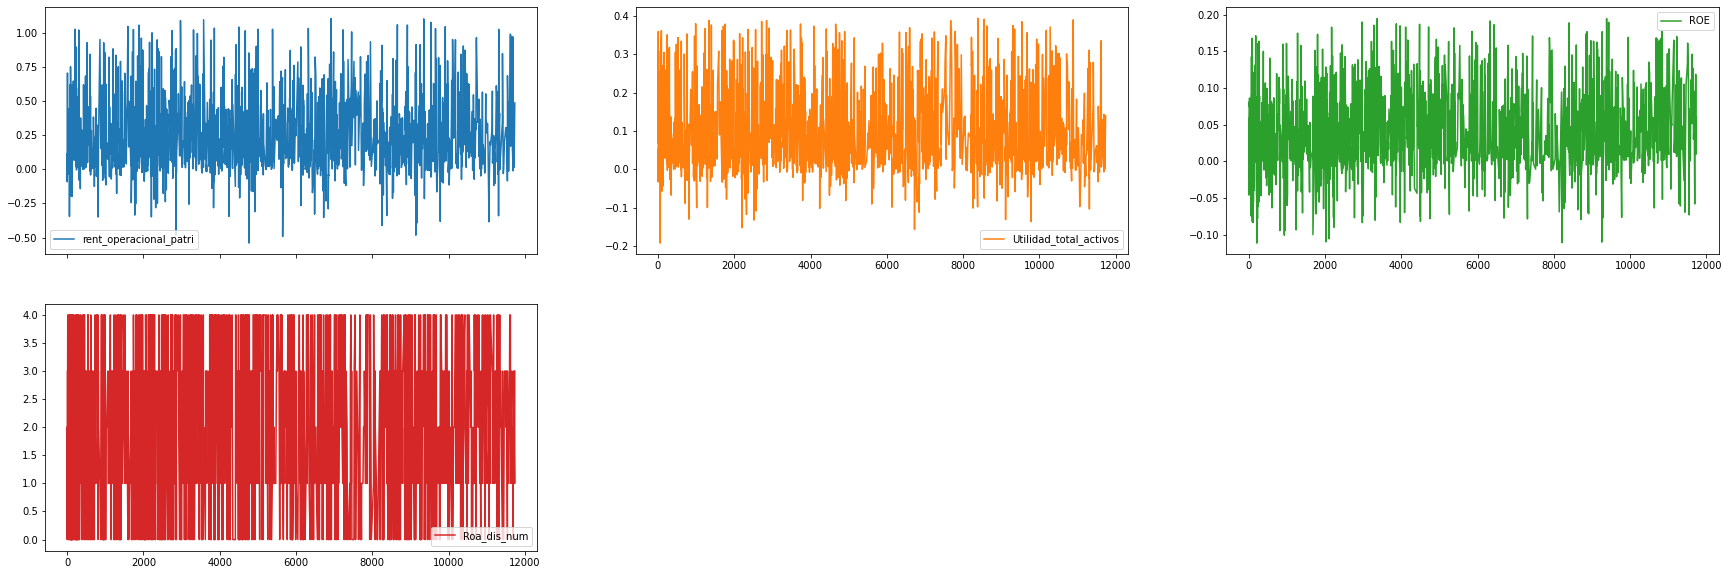

In [111]:
data_roa.plot(subplots=True, layout=(-1,3), figsize=(30,10) )

In [130]:
x = data_roa[['rent_operacional_patri',
           'Utilidad_total_activos',
           'ROE']]
y = data_roa[['Roa_dis_num']]

In [131]:
dataX = pd.DataFrame(x)
dataY = pd.DataFrame(y)

In [132]:
X = dataX.to_numpy()
X

array([[ 0.11289293,  0.05181951,  0.02965559],
       [-0.09170358, -0.03290078, -0.04617106],
       [ 0.12907682,  0.03605707,  0.05864824],
       ...,
       [ 0.01460389,  0.00154365,  0.11853252],
       [ 0.3594124 ,  0.12450783,  0.00971861],
       [ 0.48613971,  0.13928075,  0.05980571]])

In [133]:
Y = dataY.to_numpy()
Y

array([[2],
       [0],
       [3],
       ...,
       [2],
       [1],
       [3]], dtype=int8)

In [134]:
x.shape

(1760, 3)

In [135]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20)
# Los datos se entrenaron y se realizo el testeo, con una precision 0,20 o 20%

In [136]:
import sklearn
scaler = sklearn.preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [137]:
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [138]:
y_train = y_train.view(y_train.shape[0],1) #redimension a matriz
y_test = y_test.view(y_test.shape[0],1)

In [139]:
class LR_Model(torch.nn.Module):
  def __init__(self, n_features):
    super(LR_Model,self).__init__()
    self.layer1 = torch.nn.Linear(n_features, 1)

  def forward(self, x):
    #y_hat = self.layer1(x)
    y_hat = torch.sigmoid(self.layer1(x)) #regresión logistica necesita la función sigmoid
    return y_hat

In [140]:
#función que visualiza la evolución de la perdida y la precisión en cada epoch
def plot_loss(epochs, loss, loss_test, acc):
  xlim = len(loss)
  #epochs = np.linspace(1,xlim,xlim).astype(int)
  plt.plot(epochs,loss)
  plt.plot(epochs,loss_test)
  plt.plot(epochs,acc)
  plt.xlabel('Epochs')
  plt.ylabel('Value')
  plt.legend(('Train loss','Test loss','Accuracy'),loc='center right',shadow=True)
  plt.title('Train and Test Loss vs Accuracy')

In [141]:
#función que realiza el entrenamiento
def train(num_epochs, optimizer, cost, model):
  #listas usadas para guardar los valores de pérdida, precisión, para cada epoch
  #esta información sirve para graficar el proceso de entrenamiento
  loss_vals = []
  loss_test_vals = []
  acc_vals = []
  epoch_vals = []
  #entrenamiento
  for epoch in range(num_epochs):
    y_hat = model(x_train)
    loss = cost(y_hat,y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    #se evalua cada 5 epochs
    if (epoch+1)%5 == 0:
      with torch.no_grad():
        loss_vals.append(loss.item())
        y_hat_test = model(x_test)  #se usan los datos de prueba para evaluar el modelo
        loss_test = cost(y_hat_test, y_test)
        loss_test_vals.append(loss_test.item())
        y_hat_class = y_hat_test
        accuracy = (y_hat_class.eq(y_test).sum())/float(y_hat_test.shape[0]) #se cuenta las correctas y se divide para el total de datos de prueba
        acc_vals.append(accuracy.item())
        epoch_vals.append(epoch)
      print(f'epoch:{epoch+1} loss={loss.item()} loss_test={loss_test.item()} accuracy={accuracy.item()}')
  plot_loss(epoch_vals,loss_vals,loss_test_vals,acc_vals)

epoch:5 loss=-0.22651395201683044 loss_test=-0.6619699597358704 accuracy=0.0
epoch:10 loss=-1.720289945602417 loss_test=-2.169039726257324 accuracy=0.0
epoch:15 loss=-3.0393755435943604 loss_test=-3.526000738143921 accuracy=0.0
epoch:20 loss=-4.285871982574463 loss_test=-4.819397926330566 accuracy=0.0
epoch:25 loss=-5.497439384460449 loss_test=-6.081382751464844 accuracy=0.0
epoch:30 loss=-6.689626693725586 loss_test=-7.325239658355713 accuracy=0.0
epoch:35 loss=-7.869981288909912 loss_test=-8.559893608093262 accuracy=0.0
epoch:40 loss=-9.564901351928711 loss_test=-10.475286483764648 accuracy=0.0
epoch:45 loss=-12.55935287475586 loss_test=-13.050792694091797 accuracy=0.0
epoch:50 loss=-17.73822784423828 loss_test=-17.62870979309082 accuracy=0.0
epoch:55 loss=-23.578264236450195 loss_test=-23.91522216796875 accuracy=0.0
epoch:60 loss=-28.564001083374023 loss_test=-30.573266983032227 accuracy=0.0
epoch:65 loss=-33.44938659667969 loss_test=-33.29617691040039 accuracy=0.0
epoch:70 loss=-37

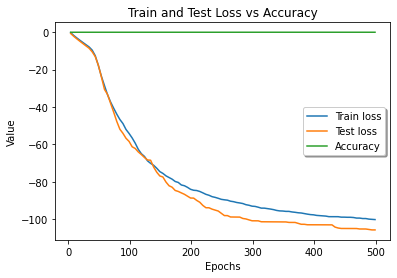

In [142]:
n_features = x.shape[1] #en este caso 30 features
lr_model = LR_Model(n_features)
costo =  torch.nn.BCELoss()  #Notese que BCE (Binary Cross Entropy) es adecuado para regresión logistica.
optim = torch.optim.SGD(lr_model.parameters(),lr=1e-1) #gradiente descendente 0.01
train(num_epochs=500, optimizer=optim, cost=costo, model=lr_model)

In [143]:
lr_model.layer1.weight

Parameter containing:
tensor([[-1.7428,  2.5187, 11.6375]], requires_grad=True)

In [144]:
lr_model.layer1.bias

Parameter containing:
tensor([16.6085], requires_grad=True)

In [127]:
x = torch.from_numpy(np.array([[0.066549, 0.299091, 0.059823]],dtype='float32'))
y = lr_model(x) #predicción
print(y)

tensor([[1.]], grad_fn=<SigmoidBackward0>)


In [145]:
x

,rent_operacional_patri,Utilidad_total_activos,ROE
1,0.112893,0.051820,0.029656
2,-0.091704,-0.032901,-0.046171
4,0.129077,0.036057,0.058648
8,0.705121,0.359713,0.055154
11,0.142573,0.067217,0.055185
...,...,...,...
11699,0.345374,0.084077,0.095347
11706,0.117946,0.057972,0.042302
11718,0.014604,0.001544,0.118533
11733,0.359412,0.124508,0.009719


In [146]:
y

,Roa_dis_num
1,2
2,0
4,3
8,3
11,3
...,...
11699,3
11706,3
11718,2
11733,1


In [149]:
x['Prediccion_ROA'] = 0.0
y['Prediccion_ROA'] = 0.0

<ipython-input-149-9a5e48a0f592>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Prediccion_ROA'] = 0.0


In [150]:

for i in range(x.shape[0]):
    x_pre = torch.from_numpy(np.array([ x.iloc[i, 0],
                                        x.iloc[i, 1],
                                        x.iloc[i, -1]],dtype='float32'))
    y_pre = lr_model(x_pre) #predicción
    j = y_pre.detach().numpy() #convertido en numpy
    print(f'predicción: {y_pre} , {j}')
    x.Prediccion_ROA[i] = j
    y.Prediccion_ROA[i] = j

predicción: tensor([1.0000], grad_fn=<SigmoidBackward0>) , [0.9999999]
predicción: tensor([1.], grad_fn=<SigmoidBackward0>) , [1.]
predicción: tensor([1.0000], grad_fn=<SigmoidBackward0>) , [0.9999999]
predicción: tensor([1.0000], grad_fn=<SigmoidBackward0>) , [0.9999999]
predicción: tensor([1.0000], grad_fn=<SigmoidBackward0>) , [0.9999999]
predicción: tensor([1.0000], grad_fn=<SigmoidBackward0>) , [0.9999999]
predicción: tensor([1.0000], grad_fn=<SigmoidBackward0>) , [0.9999999]
predicción: tensor([1.], grad_fn=<SigmoidBackward0>) , [1.]
predicción: tensor([1.0000], grad_fn=<SigmoidBackward0>) , [0.9999999]
predicción: tensor([1.0000], grad_fn=<SigmoidBackward0>) , [0.9999999]
predicción: tensor([1.], grad_fn=<SigmoidBackward0>) , [1.]
predicción: tensor([1.0000], grad_fn=<SigmoidBackward0>) , [0.9999999]
predicción: tensor([1.0000], grad_fn=<SigmoidBackward0>) , [0.9999999]
predicción: tensor([1.0000], grad_fn=<SigmoidBackward0>) , [0.9999999]
predicción: tensor([1.0000], grad_fn=<S

<ipython-input-150-f0fb731b427e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.Prediccion_ROA[i] = j
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)


predicción: tensor([1.0000], grad_fn=<SigmoidBackward0>) , [0.9999999]
predicción: tensor([1.0000], grad_fn=<SigmoidBackward0>) , [0.9999999]
predicción: tensor([1.], grad_fn=<SigmoidBackward0>) , [1.]
predicción: tensor([1.0000], grad_fn=<SigmoidBackward0>) , [0.9999999]
predicción: tensor([1.0000], grad_fn=<SigmoidBackward0>) , [0.9999999]
predicción: tensor([1.], grad_fn=<SigmoidBackward0>) , [1.]
predicción: tensor([1.0000], grad_fn=<SigmoidBackward0>) , [0.9999999]
predicción: tensor([1.0000], grad_fn=<SigmoidBackward0>) , [0.9999999]
predicción: tensor([1.0000], grad_fn=<SigmoidBackward0>) , [0.9999999]
predicción: tensor([1.], grad_fn=<SigmoidBackward0>) , [1.]
predicción: tensor([1.0000], grad_fn=<SigmoidBackward0>) , [0.9999999]
predicción: tensor([1.0000], grad_fn=<SigmoidBackward0>) , [0.9999999]
predicción: tensor([1.0000], grad_fn=<SigmoidBackward0>) , [0.9999999]
predicción: tensor([1.0000], grad_fn=<SigmoidBackward0>) , [0.9999999]
predicción: tensor([1.0000], grad_fn=<S

In [151]:
x

,rent_operacional_patri,Utilidad_total_activos,ROE,Prediccion_ROA
1,0.112893,0.051820,0.029656,1.0
2,-0.091704,-0.032901,-0.046171,1.0
4,0.129077,0.036057,0.058648,1.0
8,0.705121,0.359713,0.055154,1.0
11,0.142573,0.067217,0.055185,1.0
...,...,...,...,...
11699,0.345374,0.084077,0.095347,0.0
11706,0.117946,0.057972,0.042302,0.0
11718,0.014604,0.001544,0.118533,0.0
11733,0.359412,0.124508,0.009719,0.0
